<a href="https://colab.research.google.com/github/RyuMyunggi/NASA-battery-dataset-eda/blob/main/eda_for_discharge_capacities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import 
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from os import path
from google.colab import drive

json load complete..
total data length:  168
json load complete..
total data length:  168
json load complete..
total data length:  168
json load complete..
total data length:  132


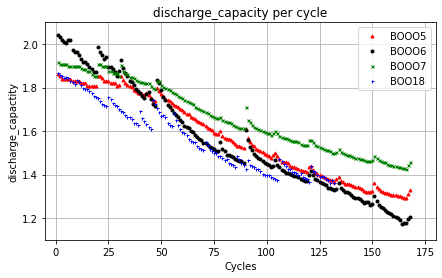

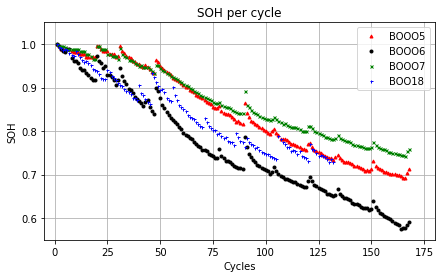

In [8]:
# data processing and draw plot

def get_battery_data():
    # return
    battery_data = {
        'B0005': {},
        'B0006': {},
        'B0007': {},
        'B0018': {},
    }

    for battery in ['B0005', 'B0006', 'B0007', 'B0018']:
        # load data
        file_path = f'/content/drive/MyDrive/NASA-processing-data/{battery}_discharge.json'
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            print('json load complete..')
            print('total data length: ', len(json_data))

            discharge_capacities = []
            cycles = []
            for idx, number in enumerate(json_data):
                data = json_data[number]
                cycles.append(idx + 1)
                currents = data.get('current_battery')
                times = data.get('time')
                sub_times = get_sub_times(times)
                ampere_hours = get_ampere_hours(currents, sub_times)
                discharge_capacities.append(sum(ampere_hours))

            rated_capacity = discharge_capacities[0]
            state_of_healths = []
            for capacity in discharge_capacities:
                soh = capacity / rated_capacity
                state_of_healths.append(soh)

            battery_data[battery]['cycles'] = cycles
            battery_data[battery]['discharge_capacity'] = discharge_capacities
            battery_data[battery]['state_of_healths'] = state_of_healths

    return battery_data

# vaild data length
def get_vaild_length_data_and_cycles(battery_data):
    # return 
    discharge_capacity = {
        'data1': [],
        'data2': [],
        'data3': [],
        'data4': [],
    }
    state_of_health = {
        'data1': [],
        'data2': [],
        'data3': [],
        'data4': [],
    }

    cycles = battery_data['B0005']['cycles']
    idx = 0
    for battery_name in battery_data:
        idx += 1
        discharge_capacity[f'data{idx}'] = battery_data[battery_name]['discharge_capacity']
        state_of_health[f'data{idx}'] = battery_data[battery_name]['state_of_healths']

    sub_cnt = len(cycles) - len(discharge_capacity['data4'])
    for i in range(0, sub_cnt):
        discharge_capacity['data4'].append(None)

    sub_cnt = len(cycles) - len(state_of_health['data4'])
    for i in range(0, sub_cnt):
        state_of_health['data4'].append(None)

    return cycles, discharge_capacity, state_of_health

# sub times
def get_sub_times(times):
    sub_times = []
    for i in range(0, len(times) - 1):
        t1 = times[i]
        t2 = times[i + 1]
        sub_times.append(t2 - t1)
    return sub_times

# ampere-hours
def get_ampere_hours(currents, sub_times):
    ampere_hours = []
    for index in range(0, len(currents) - 1):
        current = abs(currents[index])
        time = sub_times[index] / 3600
        ah = current * time
        ampere_hours.append(ah)
    return ampere_hours

# draw plot
def draw_plot(x_data, y_data, x_label, y_label, y_lim, title):
    marker_size = 3
    fig = plt.figure(figsize=(7, 4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x_data, y_data['data1'], '^', markersize=marker_size, label='BOOO5', color='r')
    ax.plot(x_data, y_data['data2'], 'o', markersize=marker_size, label='BOOO6', color='black')
    ax.plot(x_data, y_data['data3'], 'x', markersize=marker_size, label='BOOO7', color='g')
    ax.plot(x_data, y_data['data4'], '+', markersize=marker_size, label='BOO18', color='b')
    ax.set_xlim(-5, 180)
    ax.set_ylim(y_lim[0], y_lim[1])

    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

battery_data = get_battery_data()
cycles, discharge_capacity, state_of_health = get_vaild_length_data_and_cycles(battery_data)
draw_plot(cycles, discharge_capacity, 'Cycles', 'discharge_capactity', [1.1, 2.1], 'discharge_capacity per cycle')
draw_plot(cycles, state_of_health, 'Cycles', 'SOH', [0.55, 1.05], 'SOH per cycle')